**Netflix Data Set Cleaning, Analysis and Visualize in Python**

In [1]:
#import python libraries, like- numpy,pandas,and matplotlib.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#read data from csv file,and create a dataframe, using 'read_csv()' method.
NetflixData='netflix_titles.csv'
NetflixDf=pd.read_csv(NetflixData)

**Netflix Data Analysis**

In [3]:
#head()- shows top 5 rows from data list, from given dataframe.
NetflixDf.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
# info()-returns the information(like- how many columns present, data type of each column,index etc) about
# the given dataframe.
NetflixDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


**Total data entry, 8807. Total column is 12 and row is 8807.Index starting from 0 to 8806.
Director,cast,country,date_added,rating and duration columns have some missing values. Here, release_year column has only contain integer type data, othres have object type data.**

In [5]:
#describe()-returns the some brife description/information(like-count,mean,std,min etc) about given dataframe.
NetflixDf.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [6]:
#describe(include=object)- include is parameter, object is value of the parameter,
# which says that ,to give description from the columns in the given dataframe which contain object data types.
NetflixDf.describe(include=object)

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,3207,1793,362,4


In [7]:
#isnull()-returns True or False,if any null values present or not in any column. 
#sum()- calculates sum, how many null value present in the dataframe.
NetflixDf.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

**Here, we can see that, there are 2634,825,831,10,4 and 3 null values present in director,cast, country,date_added,rating and duration columns respectively in the dataframe.**

**Data Cleaning**

In [8]:
#duplicated()- returns True, if duplicate row is persent.
NetflixDf.duplicated().sum()

0

**duplicated().sum()- returns us 0, it's mean there is no duplicate row present in the given Dataframe**

In [9]:
NetflixDf.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


**Using isnull() method, we see that some null values persent in the some columns. So, we start cleaning the dataframe, to get better result in analysis and visualization**

In [10]:
#use fillna() method for filling null values in the director column. 
NetflixDf['director'].fillna(value='Unknown',inplace=True)
NetflixDf['director'].isnull().sum()

0

**2634 null values persent in the director column. If we drop all the null value columns, then it will impact a huge difference in the result. So, thats why use, fillna() method.
Here, after filling the null values with value='Unknown', the isnull().sum() returns 0. That means, all the null values are filled.**

In [11]:
#use fillna() method for filling null values in the cast column. 
NetflixDf['cast'].fillna(value='Name not mentioned',inplace=True)
NetflixDf['cast'].isnull().sum()

0

**825 null values persent in the cast column. If we drop all the null value columns, then it will impact a huge difference in the result. So, thats why use, fillna() method.
Here, after filling the null values with value='Name not mentioned', the isnull().sum() returns 0. That means, all the null values are filled.**

In [12]:
#use fillna() method for filling null values in the country column. 
NetflixDf['country'].fillna(value='Unspecified',inplace=True)
NetflixDf['country'].isnull().sum()

0

In [13]:
#use fillna() method for filling null values in the date_added column. 
NetflixDf['date_added'].fillna(value='Not Mentioned',inplace=True)
NetflixDf['date_added'].isnull().sum()

0

In [14]:
#use fillna() method for filling null values in the rating column. 
NetflixDf['rating'].fillna(value='UR', inplace=True) #UR- means unrated
NetflixDf['rating'].isnull().sum()

0

In [15]:
print("\nShow the rows in duration Column, which contain the null values ")
NetflixDf[NetflixDf['duration'].isnull()]


Show the rows in duration Column, which contain the null values 


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


In [16]:
#use ffill() method for filling null values with the value from the previous row in the duration column. 
NetflixDf['duration'].ffill( inplace=True)
NetflixDf['duration'].isnull().sum()

0

In [17]:
NetflixDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      8807 non-null   object
 4   cast          8807 non-null   object
 5   country       8807 non-null   object
 6   date_added    8807 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8807 non-null   object
 9   duration      8807 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


**Here,using info()- we see that the data is cleaned. And 8807 numbers of information present in the all columns.**

In [18]:
NetflixDf.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

**There is no null value present in the given Netflix data set.**

In [19]:
#pivot_table()- create a spreadsheet pivot table as a dataframe.
# Here, we show that, how many types of Netflix shows present, and total number of shows in each type. 
pd.pivot_table(NetflixDf,index=['type'],values=['title'],aggfunc=["count"])

,count
,title
type,
Movie,6131
TV Show,2676


**2 types of Netfilx shows present. They are Movie and Tv Shows.
6131 movies released on Netflix and 2676 TV Shows released on Netflix.**

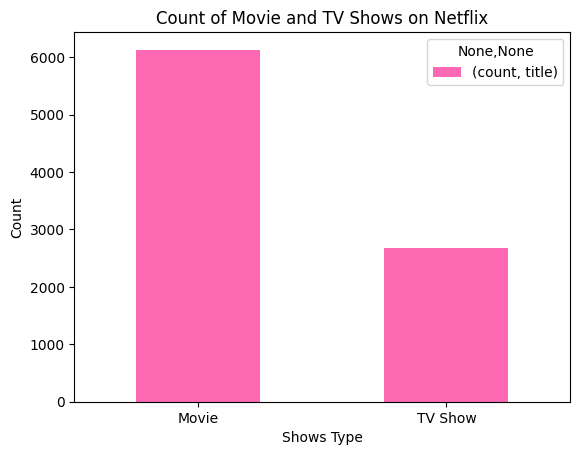

In [20]:
#bar-plot
showstype_table_result=pd.pivot_table(NetflixDf,index=['type'],values=['title'],aggfunc=["count"])
showstype_table_result.plot(kind='bar',color='Hotpink')
plt.title('Count of Movie and TV Shows on Netflix')
plt.xlabel('Shows Type')
plt.xticks(rotation=0)
plt.ylabel('Count')
plt.show()

**Here we see in the bar plot, that Above 6000+ Movie on Netfilx, and 2000+ TV Shows on the Netflix**

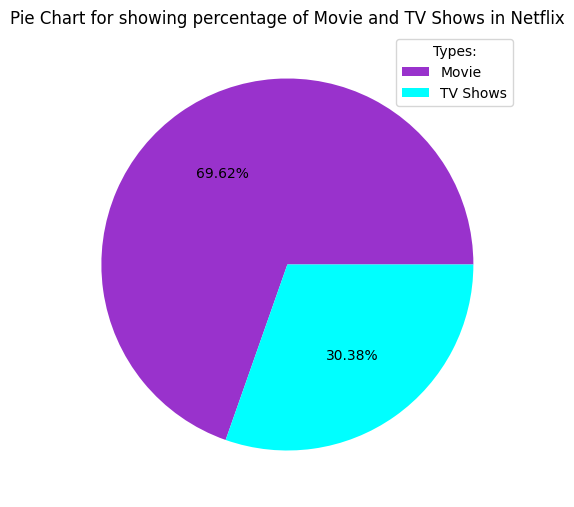

In [21]:
#Pie()-function to draw pie charts
#Here, we show total percentage of Netfilx shows type.
Shows_type=NetflixDf.pivot_table(index=['type'], values='title', aggfunc='count')
values=Shows_type.values.flatten()
Type_labels =[ 'Movie', 'TV Shows']
plt.figure(figsize=(6, 8))
plt.title('Pie Chart for showing percentage of Movie and TV Shows in Netflix')
plt.pie(values, autopct='%1.2f%%',colors=["DarkOrchid","Aqua"])
plt.legend(title='Types:',labels=Type_labels)
plt.show()

**In the Pie Chart, We can see 69.62% is Movies and 30.38% is TV shows on Total 100%**

In [22]:
NetflixDf.head(1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Name not mentioned,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."


In [23]:
#Create a pivot_table, to show how many types of rating Netflix shows have received.
print("\nIn Pivot Table show Year wise released Netflix's type(Movie and TV shows) count:-")
pd.pivot_table(NetflixDf,index=['rating'],values=['title'],aggfunc=['count','sum'])


In Pivot Table show Year wise released Netflix's type(Movie and TV shows) count:-


,count,sum
,title,title
rating,,
66 min,1,Louis C.K.: Live at the Comedy Store
74 min,1,Louis C.K. 2017
84 min,1,Louis C.K.: Hilarious
G,41,A Champion HeartHachi: A Dog's TaleMy Fair Lad...
NC-17,3,Swearnet: The MovieBlue Is the Warmest ColorLa...
NR,80,(T)ERROR13 Cameras4th Man OutA Russell Peters ...
PG,287,My Little Pony: A New GenerationJawsJaws 2Jaws...
PG-13,490,Dick Johnson Is DeadThe StarlingGrown UpsDark ...


**Here, we see 17 types of rating Netflix shows have received. 3207 numbers of Netflix shows get TV-MA rating.**

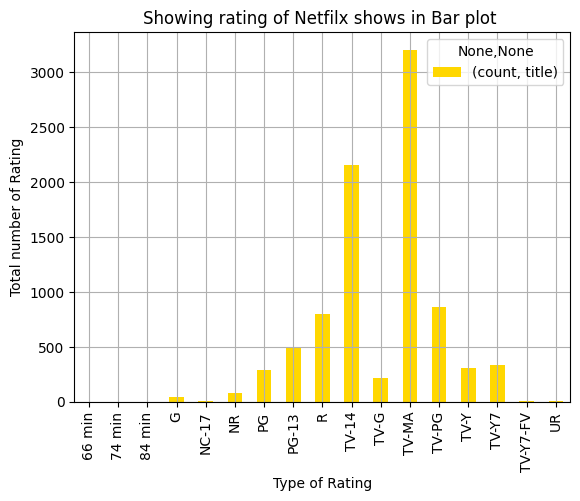

In [24]:
#Use bar-plot to show rating of Netflix show types.
Rating_wise_show=pd.pivot_table(NetflixDf,index=['rating'],values=['title'],aggfunc=['count'])
Rating_wise_show.plot(kind='bar',color='gold')
plt.title("Showing rating of Netfilx shows in Bar plot ")
plt.xlabel("Type of Rating")
plt.ylabel("Total number of Rating")
plt.grid()
plt.show()

**Here, We see the 3207 numbers of Netflix Shows out of 8807, got TV-MA rating.**

In [25]:
#Create a pivot table to show title sum according to the released year.
release_year_pivot_table=pd.pivot_table(NetflixDf,index=['release_year'],values=['title'],aggfunc=['count'])
#set_option()- function in pandas that allows us to set various options for controlling the behavior of the library. 
# We set value for showing all the rows according to the Released_year.
pd.set_option('display.max_rows', None)
print(release_year_pivot_table)

             count
             title
release_year      
1925             1
1942             2
1943             3
1944             3
1945             4
1946             2
1947             1
1954             2
1955             3
1956             2
1958             3
1959             1
1960             4
1961             1
1962             3
1963             2
1964             2
1965             2
1966             1
1967             5
1968             3
1969             2
1970             2
1971             5
1972             5
1973            10
1974             7
1975             7
1976             9
1977             7
1978             7
1979            11
1980            11
1981            13
1982            17
1983            11
1984            12
1985            10
1986            13
1987             8
1988            18
1989            16
1990            22
1991            17
1992            23
1993            28
1994            22
1995            25
1996            24
1997        

In [26]:
release_year_pivot_table.info()

<class 'pandas.core.frame.DataFrame'>
Index: 74 entries, 1925 to 2021
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   (count, title)  74 non-null     int64
dtypes: int64(1)
memory usage: 1.2 KB


In [27]:
release_year_pivot_table.describe()

,count
,title
count,74.000000
mean,119.013514
std,266.982042
min,1.000000
25%,3.000000
50%,12.500000
75%,58.500000
max,1147.000000


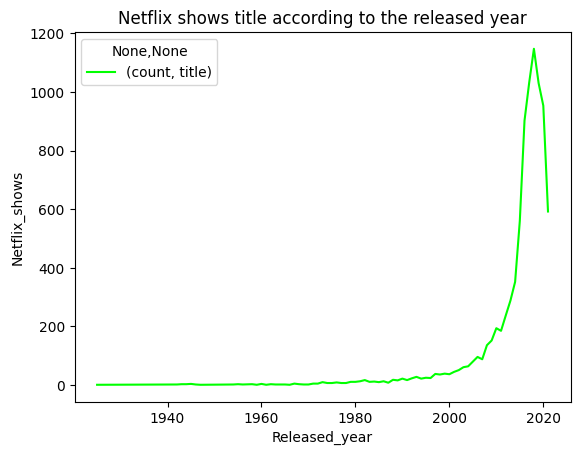

In [34]:
# line-plot
release_year_pivot_table.plot(kind='line',color='lime')  
plt.title("Netflix shows title according to the released year")
plt.xlabel("Released_year")
plt.ylabel("Netflix_shows")
plt.show()

**Here, we see that, from 1925 to 2021, Netfilx has total 8807 released shows. In the Year 2018 maximun number of shows(1147) released on Netflix**

In [29]:
NetflixDf.describe(include=object)

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,8807,8807,8807,8807,8807,8807,8807,8807,8807,8807,8807
unique,8807,2,8807,4529,7693,749,1768,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Unknown,Name not mentioned,United States,"January 1, 2020",TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,2634,825,2818,109,3207,1793,362,4


**Conclusion:-**
 After Cleaning the Netflix data set, we see there are 8807 numbers of data each column.
 After Analysis the data, we see there is 2 types of shows, one is Movies, and another is TV Shows on Netflix. Where, movie's numbers are greater than TV Shows. From United States, most of the shows(Movie or TV shows) 2818 released. 109 numbers of shows added on Netflix on 1st january,2020. 